In [83]:
import pandas as pd
import numpy as np

In [84]:
def data_dict():
    data_dict = {}
    for k,v in all_dict.items():

        copy = v.copy(deep=True)

        # name columns according to their dataframe
        for column in copy.columns.values.tolist():
            copy.rename(columns={column:column+'_'+k}, inplace=True)

        for column in copy.columns.values.tolist():
            values =  copy[column].values.tolist()
            data_dict[column] = values
            print(data_dict)

    #temp_df = pd.DataFrame(data=data_dict)

In [85]:
def import_pkl(name):
    import pickle

    # open a file, where you stored the pickled data
    file = open(name, 'rb')

    # dump information to that file
    data = pickle.load(file)

    # close the file
    file.close()

    return data

In [86]:
def check(number: int or str, df,column):    
    display(df[df[column]==number])

In [87]:
def sales_under(number):
    orders = wunder[wunder['NET']<number]['order'].values.tolist()
    
    for item in orders:
        check_orders(join_on_order(item, [actindo,magento,wunder]))

In [88]:
def margens_under(number):
    
    orders = db[db['margen']<number]['order'].values.tolist()
    
    temp = pd.merge(db,actindo,on='order')
    for order in orders:
        for k,df in all_dict:
            if k == 'db' or k == 'actindo':
                continue
            if 'order' in df.columns:
                temp = pd.merge(temp,k,on='order')
            elif 'lieferschein' in df.columns:
                temp = pd.merge(temp,k,on='lieferschein')
            else:
                print('what the fuck ', df.columns.values.tolist(), ' ', k)

In [89]:
def refunds():
      pass
def coupons():
    pass
def gross_to_net_ratio():
    pass

In [90]:
def order_or_lieferschein(df):
    if 'order' in df.columns:
        return 'order'
    if ' lieferschein' in df.columns:
        return 'lieferschein'

In [91]:
def convert_to_int_1(df, c):
    import pandas as pd
    try:
        df[c] = df[c].astype(int)
    except:
        non_numeric_series = df[c].astype(str).str.isnumeric()==False
        non_numeric_indexes = non_numeric_series[non_numeric_series == True].index.values.tolist()
        display(df.loc[non_numeric_indexes])

        df.drop(index=non_numeric_indexes, inplace=True)
    finally:
        df[c] = df[c].astype(int)

In [92]:
def convert_to_int():
    import pandas as pd
    for k,df in all_dict.items():
        if 'order' in df.columns:
            c = 'order'
        elif 'lieferschein' in df.columns:
            c = 'lieferschein'
        else:
            print('what the fuck')
            print(df.head())
        try:
            df[c] = df[c].astype(int)
        except:
            non_numeric_series = df[c].astype(str).str.isnumeric()==False
            non_numeric_indexes = non_numeric_series[non_numeric_series == True].index.values.tolist()
            display(df.loc[non_numeric_indexes])
            
            df.drop(index=non_numeric_indexes, inplace=True)
        finally:
            convert_to_int_1(df, c)

In [93]:
def join_dfs(order: int or str) -> pd.DataFrame():
    import pandas as pd
    
    temp_data = []
    temp_columns = []
    for k,v in all_dict.items():
        
        
        if 'order' in v.columns:
            xs = v[v['order'] == order]
        elif 'lieferschein' in v.columns:
            lieferscheine = actindo[actindo['order']==order]['lieferschein'].values.tolist()
            xs = pd.DataFrame()
            for lieferschein in lieferscheine:
                xs.append(v[v['lieferschein'] == lieferschein], sort=True)
                
        copy = xs.copy(deep=True)
        
        if copy.values.tolist():
            temp_data.append(copy.values.tolist()) 
        for column in copy.columns.values.tolist():
            copy.rename(columns={column:column+'_'+k}, inplace=True)
            
        if copy.columns.values.tolist():
            temp_columns.append(copy.columns.values.tolist())
        
    return pd.DataFrame(data=temp_data,
                       columns=temp_columns)

In [94]:
def get_ls_from_order(order):
    ls = actindo[actindo['order']==order]
    return ls

def get_xs(df,order):
    if 'order' in v.columns:
        print('order in ',k)
        xs = v[v['order'] == order]
    elif 'lieferschein' in v.columns:
        print('lieferschein in ',k)
        xs = get_ls_from_order(order)
        
        for lieferschein in lieferscheine:
            #if v['lieferschein'].str.contains(str(lieferschein)):
                xs.append(v[v['lieferschein'] == lieferschein], sort=True)
                


def append_by_order(order): #deprecated after introducing alle_frachter
    if not order:
        order = 120154393
    data_dict = {}
    for k,v in all_dict.items():
        if 'order' in v.columns:
            print('order in ',k)
            xs = v[v['order'] == order]
        elif 'lieferschein' in v.columns:
            print('lieferschein in ',k)
            lieferscheine = actindo[actindo['order']==order]['lieferschein'].values.tolist()
            print(lieferscheine)
            for lieferschein in lieferscheine:
                print(lieferschein)
                xs = xs.append(v[v['lieferschein'] == lieferschein], sort=True)
                display(xs)

        if not xs.empty:
            copy = xs.copy(deep=True)

            # name columns according to their dataframe
            for column in copy.columns.values.tolist():
                copy.rename(columns={column:column+'_'+k}, inplace=True)

            for column in copy.columns.values.tolist():
                values =  copy[column].values.tolist()
                data_dict[column] = values
            
            maxcount = max(len(v) for v in data_dict.values())
            for v in data_dict.values():
                v += [''] * (maxcount - len(v))
            
    temp_df = pd.DataFrame(data=data_dict)

In [95]:
def vouchers():
    voucher_orders = wunder[wunder['Voucher after returns'].astype(float)!=0]['order'].values.tolist()
    display(wunder[wunder['Voucher after returns']!=0])
    
    for item in voucher_orders:
        check_orders(number = item, df=join_dfs(item))

In [96]:
to_load = ['actindo dataframe.pkl', 'magento dataframe.pkl', 
           'wunder dataframe.pkl', 'frachter_dict.pkl', 'deckungsbeitrag.pkl',"alle_frachter.pkl"]

In [97]:
def import_all():
    import pickle
    
    global actindo,magento,wunder,db,frachter_dict,alle_frachter,db_s
    
    actindo = import_pkl('actindo dataframe.pkl')

    magento = import_pkl('magento dataframe.pkl')
    magento.drop(columns='Status',inplace=True)

    wunder = import_pkl('wunder dataframe.pkl')
    wunder.rename(columns={wunder.columns[-1]:'NET'}, inplace = True)

    frachter_dict = import_pkl('frachter_dict.pkl')
    
    alle_frachter = import_pkl("alle_frachter.pkl")
    
    
    db = import_pkl('deckungsbeitrag.pkl')
    db_s = import_pkl('deckungsbeitrag-sku.pkl')
    

    global all_dict
    all_dict = dict()
    all_dict['alle_frachter'] = alle_frachter.copy(deep=False)
    all_dict['actindo'] = actindo.copy(deep=False)
    all_dict['magento'] = magento.copy(deep=False)
    all_dict['wunder'] = wunder.copy(deep=False)
    all_dict['db'] = db.copy(deep=False)
    all_dict['db_s'] = db_s.copy(deep=False)

In [98]:
import_all()

In [99]:
all_dict.keys()

dict_keys(['alle_frachter', 'actindo', 'magento', 'wunder', 'db', 'db_s'])

In [100]:
frachter_dict.keys()

dict_keys(['DPD_Versand', 'PostNL', 'CargolineEU', 'UPS', 'Cargoline_', 'Versand_RelaisColis', 'DHL_DBS', 'DHL_SW', 'Sped'])

In [101]:
convert_to_int()

In [102]:
for k,v in all_dict.items():
    if 'order' in v.columns:
        if v.order.dtypes != 'int64':
            print(k, "\n", v.order.dtypes)
    elif 'lieferschein' in v.columns:
        if v.lieferschein.dtypes != 'int64':
            print(k, "\n", v.lieferschein.dtypes)
        
    v.reset_index(drop=True, inplace=True)

alle_frachter 
 int32
actindo 
 int32
magento 
 int32
wunder 
 int32
db 
 int32
db_s 
 int32


In [103]:
def explore_nans(fill=False, dictionary=all_dict, dataframe=None):
    import pandas as pd
    
    if type(dataframe) == pd.core.frame.DataFrame:
        dictionary = {'dataframe':dataframe}
        
    for k,df in dictionary.items():
        print('evaluating ',k, ' for nans')
        for column in df.columns:
            if df[column].isna().any():
                print(sum(df[column].isna()), ' nans in ', column, ' ', k)
            if fill:
                if column == 'renewal':
                    df[column].fillna('0', inplace=True)
                else:
                    fillstring = 'keine '+ column + ' Angabe'
                    df[column].fillna(fillstring,inplace=True)

In [104]:
explore_nans(fill=True)
explore_nans()

evaluating  alle_frachter  for nans
evaluating  actindo  for nans
69  nans in  name   actindo
2  nans in  plz   actindo
evaluating  magento  for nans
evaluating  wunder  for nans
evaluating  db  for nans
33373  nans in  renewal   db
evaluating  db_s  for nans
90069  nans in  renewal   db_s
evaluating  alle_frachter  for nans
evaluating  actindo  for nans
evaluating  magento  for nans
evaluating  wunder  for nans
evaluating  db  for nans
evaluating  db_s  for nans


In [105]:
explore_nans(fill=True, dictionary=frachter_dict)
explore_nans(dictionary=frachter_dict)

evaluating  DPD_Versand  for nans
evaluating  PostNL  for nans
evaluating  CargolineEU  for nans
evaluating  UPS  for nans
evaluating  Cargoline_  for nans
evaluating  Versand_RelaisColis  for nans
evaluating  DHL_DBS  for nans
evaluating  DHL_SW  for nans
evaluating  Sped  for nans
evaluating  DPD_Versand  for nans
evaluating  PostNL  for nans
evaluating  CargolineEU  for nans
evaluating  UPS  for nans
evaluating  Cargoline_  for nans
evaluating  Versand_RelaisColis  for nans
evaluating  DHL_DBS  for nans
evaluating  DHL_SW  for nans
evaluating  Sped  for nans


In [106]:
#frachter_dfs = list(frachter_dict.values())

In [107]:
#check_orders(number='19042977', df=magento)

In [108]:
alle_frachter.frachter.value_counts()

DHL_DBS                               31539
DHL_SW                                 3929
DPD SI                                 2119
Cargoline_                             2038
Post NL                                1551
Speditionsversand SI                    126
CargolineEU                             112
Sped. Relais Colis                      105
UPS                                      28
Sped. Relais Colis 2-Mann-Handling        3
Sped. Relais Colis - VP-Entsorgung        3
Name: frachter, dtype: int64

In [109]:
explore_nans(dataframe = alle_frachter)

evaluating  dataframe  for nans


In [110]:
explore_nans(dictionary={'actindo':actindo, 'magento':magento, 'wunder':wunder, 'db':db})

evaluating  actindo  for nans
evaluating  magento  for nans
evaluating  wunder  for nans
evaluating  db  for nans
33373  nans in  renewal   db


In [111]:
## actindo und frachter
print(alle_frachter.lieferschein.isna().value_counts())
print(actindo.lieferschein.isna().value_counts())
af = pd.merge(actindo,alle_frachter,on='lieferschein')
print(af.lieferschein.isna().value_counts())
explore_nans(dataframe=af)

False    41553
Name: lieferschein, dtype: int64
False    36918
Name: lieferschein, dtype: int64
False    41123
Name: lieferschein, dtype: int64
evaluating  dataframe  for nans


In [112]:
print(af.order.isna().value_counts())
print(magento.order.isna().value_counts())
afm = pd.merge(af,magento,on='order')
print(afm.order.isna().value_counts())

False    41123
Name: order, dtype: int64
False    38853
Name: order, dtype: int64
False    38241
Name: order, dtype: int64


In [113]:
print(afm.order.isna().value_counts())
print(wunder.order.isna().value_counts())
afmw = pd.merge(afm,wunder,on='order')
print(afmw.order.isna().value_counts())

False    38241
Name: order, dtype: int64
False    38831
Name: order, dtype: int64
False    37970
Name: order, dtype: int64


In [115]:
print(afmw.order.isna().value_counts())
print(db.order.isna().value_counts())
db.order = db.order.astype(int)
afmwd = pd.merge(afmw,db,on='order')
print(afmwd.order.isna().value_counts())

False    37970
Name: order, dtype: int64
False    33379
Name: order, dtype: int64
False    36398
Name: order, dtype: int64


In [122]:
print(afmw.order.isna().value_counts())
print(db.order.isna().value_counts())
db_s.order = db_s.order.astype(int)
afmwd_s = pd.merge(afmw,db_s,on='order')
print(afmwd_s.order.isna().value_counts())

False    37970
Name: order, dtype: int64
False    33379
Name: order, dtype: int64
False    109694
Name: order, dtype: int64


In [123]:
def replace_country_names(afmwd):    
    afmwd.land = afmwd.land.str.replace('Deutschland', 'DE')
    afmwd.land = afmwd.land.str.replace('Frankreich', 'FR')
    afmwd.land = afmwd.land.str.replace('Österreich', 'AT')
    afmwd.land = afmwd.land.str.replace('Belgien', 'BE')
    afmwd.land = afmwd.land.str.replace('Niederlande', 'NL')
    afmwd.land = afmwd.land.str.replace('Tschechische Republik', 'CZ')
    afmwd.land = afmwd.land.str.replace('Schweiz', 'CH')
    afmwd.land = afmwd.land.str.replace('LU', 'Luxemburg')

In [124]:
for df in all_dict.values():
    if 'land' in df.columns:
        replace_country_names(df)

In [125]:
replace_country_names(afmwd)

In [126]:
replace_country_names(afmwd_s)

In [127]:
alle_frachter.frachter.value_counts()

DHL_DBS                               31539
DHL_SW                                 3929
DPD SI                                 2119
Cargoline_                             2038
Post NL                                1551
Speditionsversand SI                    126
CargolineEU                             112
Sped. Relais Colis                      105
UPS                                      28
Sped. Relais Colis 2-Mann-Handling        3
Sped. Relais Colis - VP-Entsorgung        3
Name: frachter, dtype: int64

In [128]:
afmwd.frachter.value_counts()

DHL_DBS                               28725
DHL_SW                                 2388
DPD SI                                 1953
Cargoline_                             1610
Post NL                                1416
Speditionsversand SI                    101
Sped. Relais Colis                       94
CargolineEU                              93
UPS                                      12
Sped. Relais Colis 2-Mann-Handling        3
Sped. Relais Colis - VP-Entsorgung        3
Name: frachter, dtype: int64

In [129]:
#afmwd.to_excel('4. afmwd.xlsx', engine='xlsxwriter')

In [130]:
#afmwd_for_martin = afmwd[['order','lieferschein', 'gross','NET', 'Leistung', 'land', 'frachter','Anmerkung']]

In [131]:
#afmwd_s_for_martin = afmwd_s[['order','lieferschein', 'gross','NET', 'Leistung', 'land', 'frachter','Anmerkung', 'sku']]

In [132]:
#afmwd_for_martin.to_excel('4. afmwd_for_martin.xlsx', engine='xlsxwriter')

In [133]:
#afmwd_s_for_martin.to_excel('4. afmwd_for_martin.xlsx', engine='xlsxwriter')

In [134]:
def view_duplicated(df):
    a = df['order'].duplicated()
    i = 0
    for item in a.values:
        print(item)
        check(df, item)
        i += 1
        if i ==10:
            break

In [135]:
def collapse(df):
    import pandas as pd
    
    midxr = pd.MultiIndex.from_arrays([df['order'].values,df['lieferschein'].values,
                                       df['gross'].values,df['betrag'].values,
                                       df.index],names=['ORDER', 'LS', 'GROSS',
                                                        'BETRAG','ind'])
    #midxc = pd.MultiIndex.from_product([['ACT'], df.columns],names=['Quelle','cols'])
    mi = pd.DataFrame(df.values,
                      index=midxr,
                         columns=df.columns)#drop(columns=['order', 'lieferschein', 
                                             #     'gross','betrag']).columns)
    return mi

In [136]:
a = afmwd['order'].duplicated().to_frame()
ind = a[a['order']==True].index.values.tolist()
duplicated_orders = afmwd.loc[ind, 'order'].unique()
duplicated_orders

i=0
for order in duplicated_orders:
    i +=1
    display(afmwd[afmwd['order']==order].drop(columns=['date_y', 'name_y', 'plz_y', 
                                                       'renewal', 'sent to', 'name', 
                                                        'date_x', 'Menge', 'Pakete', 
                                                       'Pos', 'Art', 'ZLST', 'Collis', 'Pal', 'Einheit']))
    if i == 100:
        i/=100
        inp = input('continue?')
        if inp =='no':
            break

,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
14,120126171,19023238,Anke,20255,01.01.2019,DE,7.5,DHL_DBS,bis 2Kg,01.01.2019,177.65,209.00,209.00,0.00,0.00,26.34,175.63,61.2339
15,120126171,19023238,Anke,20255,01.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,01.01.2019,177.65,209.00,209.00,0.00,0.00,26.34,175.63,61.2339
16,120126171,19026206,Anke,20255,23.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,01.01.2019,177.65,209.00,209.00,0.00,0.00,26.34,175.63,61.2339


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
21,120126178,19023243,Jacqueline,33330,01.01.2019,DE,7.5,DHL_DBS,bis 2Kg,01.01.2019,225.25,265.00,265.00,0.00,0.00,33.40,222.69,81.5128
22,120126178,19023243,Jacqueline,33330,01.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,01.01.2019,225.25,265.00,265.00,0.00,0.00,33.40,222.69,81.5128


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
27,120126192,19023248,Christian,85221,01.01.2019,DE,18.5,DHL_DBS,BT Stühle,01.01.2019,322.95,372.00,372.00,0.00,0.00,41.22,312.61,110.2005
28,120126192,19023248,Christian,85221,01.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,01.01.2019,322.95,372.00,372.00,0.00,0.00,41.22,312.61,110.2005


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
32,120126200,19023252,Christian,14163,01.01.2019,DE,7.5,DHL_DBS,bis 2Kg,01.01.2019,301.00,301.00,301.00,0.00,0.00,0.00,252.94,111.4712
33,120126200,19023252,Christian,14163,01.01.2019,DE,7.5,DHL_DBS,bis 2Kg,01.01.2019,301.00,301.00,301.00,0.00,0.00,0.00,252.94,111.4712


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
57,120126238,19023280,Dr.,78315,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,260.00,260.00,260.00,0.00,0.00,0.00,218.49,82.1296
58,120126238,19023280,Dr.,78315,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,260.00,260.00,260.00,0.00,0.00,0.00,218.49,82.1296


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
68,120126252,19023290,Sabine,27432,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,380.00,380.00,380.00,0.00,0.00,0.00,319.33,138.3077
69,120126252,19023290,Sabine,27432,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,380.00,380.00,380.00,0.00,0.00,0.00,319.33,138.3077
70,120126252,19023290,Sabine,27432,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,380.00,380.00,380.00,0.00,0.00,0.00,319.33,138.3077
71,120126252,19023290,Sabine,27432,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,380.00,380.00,380.00,0.00,0.00,0.00,319.33,138.3077


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
74,120126245,19023293,Miriam,30177,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,158.00,158.00,158.00,0.00,0.00,0.00,132.77,56.5691
75,120126245,19023293,Miriam,30177,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,158.00,158.00,158.00,0.00,0.00,0.00,132.77,56.5691


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
89,120126296,19023371,Melanie,45147,02.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,02.01.2019,178.56,192.00,192.00,0.00,0.00,11.29,161.34,54.5484
90,120126296,19024585,Melanie,45147,11.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,02.01.2019,178.56,192.00,192.00,0.00,0.00,11.29,161.34,54.5484


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
91,120126297,19023372,ANTON,2380,02.01.2019,AT,17.4,DHL_DBS,Design Bestseller In,02.01.2019,470.00,470.00,470.00,0.00,0.00,0.00,391.67,178.2867
92,120126297,19023372,ANTON,2380,02.01.2019,AT,17.4,DHL_DBS,Design Bestseller In,02.01.2019,470.00,470.00,470.00,0.00,0.00,0.00,391.67,178.2867


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
107,120126334,19023391,Tobias,26632,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,229.71,247.00,247.00,0.00,0.00,14.53,207.56,71.1836
108,120126334,19023391,Tobias,26632,02.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,229.71,247.00,247.00,0.00,0.00,14.53,207.56,71.1836


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
109,120126335,19023392,Bert-Ulrich,10781,02.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,02.01.2019,260.00,260.00,260.00,0.00,0.00,0.00,218.49,93.9496
110,120126335,19023392,Bert-Ulrich,10781,02.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,02.01.2019,260.00,260.00,260.00,0.00,0.00,0.00,218.49,93.9496


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
135,120126208,19023493,Lisa,88074,03.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,01.01.2019,210.00,210.00,210.00,0.00,0.00,0.00,176.47,97.0906
136,120126208,19025788,Lisa,88074,21.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,01.01.2019,210.00,210.00,210.00,0.00,0.00,0.00,176.47,97.0906
137,120126208,19033642,Lisa,88074,14.03.2019,DE,7.5,DHL_DBS,bis 2Kg,01.01.2019,210.00,210.00,210.00,0.00,0.00,0.00,176.47,97.0906


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
139,200000816,19023498,anne,8925CN,03.01.2019,NL,40.3,DHL_DBS,Design Bestseller In,03.01.2019,163.00,163.00,163.00,0.00,0.00,0.00,134.71,55.1107
140,200000816,19026543,anne,8925CN,24.01.2019,NL,20.3,DHL_DBS,Design Bestseller In,03.01.2019,163.00,163.00,163.00,0.00,0.00,0.00,134.71,55.1107


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
151,120126422,19023513,Christian,22525,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719
152,120126422,19023513,Christian,22525,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719
153,120126422,19023513,Christian,22525,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719
154,120126422,19023513,Christian,22525,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719
155,120126422,19023513,Christian,22525,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719
156,120126422,19023513,Christian,22525,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719
157,120126422,19023513,Christian,22525,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719
158,120126422,19023513,Christian,22525,03.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,03.01.2019,1880.00,"1,880.00","1,880.00",0.00,0.00,0.00,"1,579.83",779.8719


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
179,120126465,19023536,Ammar,22455,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,338.30,398.00,398.00,0.00,0.00,50.17,334.45,115.6390
180,120126465,19023536,Ammar,22455,03.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,338.30,398.00,398.00,0.00,0.00,50.17,334.45,115.6390


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
183,120126160,19023546,Jörg,33615,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,01.01.2019,1001.04,"1,032.00","1,032.00",0.00,0.00,26.02,867.23,321.1365
184,120126160,19023546,Jörg,33615,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,01.01.2019,1001.04,"1,032.00","1,032.00",0.00,0.00,26.02,867.23,321.1365


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
199,120126408,19023574,Dr.Leoni,01307,04.01.2019,DE,43,Cargoline_,,03.01.2019,511.19,527.00,527.00,0.00,0.00,13.29,442.86,168.5114
200,120126408,19023574,Dr.Leoni,01307,04.01.2019,DE,85,Cargoline_,,03.01.2019,511.19,527.00,527.00,0.00,0.00,13.29,442.86,168.5114


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
201,120126392,19023575,Armin,21272,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,933.14,962.00,962.00,0.00,0.00,24.25,808.40,307.1933
202,120126392,19023575,Armin,21272,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,933.14,962.00,962.00,0.00,0.00,24.25,808.40,307.1933
203,120126392,19025296,Armin,21272,17.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,933.14,962.00,962.00,0.00,0.00,24.25,808.40,307.1933


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
204,120126357,19023576,VERONICA,50679,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,832.20,876.00,876.00,0.00,0.00,36.81,736.13,240.3277
205,120126357,19023576,VERONICA,50679,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,832.20,876.00,876.00,0.00,0.00,36.81,736.13,240.3277
206,120126357,19023576,VERONICA,50679,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,832.20,876.00,876.00,0.00,0.00,36.81,736.13,240.3277
207,120126357,19023576,VERONICA,50679,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,832.20,876.00,876.00,0.00,0.00,36.81,736.13,240.3277
208,120126357,19023576,VERONICA,50679,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,832.20,876.00,876.00,0.00,0.00,36.81,736.13,240.3277
209,120126357,19023576,VERONICA,50679,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,03.01.2019,832.20,876.00,876.00,0.00,0.00,36.81,736.13,240.3277


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
224,120126519,19023625,Alexander,21039,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,04.01.2019,594.00,594.00,594.00,0.00,0.00,0.00,499.16,219.9797
225,120126519,19023625,Alexander,21039,04.01.2019,DE,18.5,DHL_DBS,BT Stühle,04.01.2019,594.00,594.00,594.00,0.00,0.00,0.00,499.16,219.9797


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
262,200000846,19023674,Ineke,3116EH,05.01.2019,NL,20.3,DHL_DBS,Design Bestseller In,05.01.2019,854.00,854.00,854.00,0.00,0.00,0.00,705.79,297.1851
263,200000846,19023674,Ineke,3116EH,05.01.2019,NL,20.3,DHL_DBS,Design Bestseller In,05.01.2019,854.00,854.00,854.00,0.00,0.00,0.00,705.79,297.1851
264,200000846,19023674,Ineke,3116EH,05.01.2019,NL,39.9,DHL_DBS,Design Bestseller In,05.01.2019,854.00,854.00,854.00,0.00,0.00,0.00,705.79,297.1851
265,200000846,19023674,Ineke,3116EH,05.01.2019,NL,39.9,DHL_DBS,Design Bestseller In,05.01.2019,854.00,854.00,854.00,0.00,0.00,0.00,705.79,297.1851


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
295,200000853,19023712,Irene,1062CJ,06.01.2019,NL,8.5,Post NL,No Anmerkung Input,06.01.2019,26.00,26.00,26.00,0.00,0.00,0.00,21.49,8.3776
296,200000853,19030874,Irene,1062CJ,22.02.2019,NL,8.5,Post NL,No Anmerkung Input,06.01.2019,26.00,26.00,26.00,0.00,0.00,0.00,21.49,8.3776


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
303,120126730,19023719,Daniel,51399,06.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,06.01.2019,284.58,306.00,306.00,0.00,0.00,18.00,257.14,89.9829
304,120126730,19023719,Daniel,51399,06.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,06.01.2019,284.58,306.00,306.00,0.00,0.00,18.00,257.14,89.9829


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
307,120126734,19023722,Sandra,21385,06.01.2019,DE,7.5,DHL_DBS,bis 2Kg,06.01.2019,241.00,241.00,241.00,0.00,0.00,0.00,202.52,83.6110
308,120126734,19023722,Sandra,21385,06.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,06.01.2019,241.00,241.00,241.00,0.00,0.00,0.00,202.52,83.6110


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
336,700001669,19023756,Nicole,85560,07.01.2019,DE,7.5,DHL_SW,bis 2Kg,07.01.2019,241.00,241.00,241.00,0.00,0.00,0.00,202.52,83.6110
337,700001669,19023756,Nicole,85560,07.01.2019,DE,7.5,DHL_SW,bis 2Kg,07.01.2019,241.00,241.00,241.00,0.00,0.00,0.00,202.52,83.6110
338,700001669,19023756,Nicole,85560,07.01.2019,DE,8.15,DHL_SW,Dienstleistungen,07.01.2019,241.00,241.00,241.00,0.00,0.00,0.00,202.52,83.6110


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
363,120126840,19023812,Matthias,01099,07.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,260.40,280.00,280.00,0.00,0.00,16.47,235.29,92.3935
364,120126840,19031270,Matthias,01099,25.02.2019,DE,7.5,DHL_DBS,bis 2Kg,07.01.2019,260.40,280.00,280.00,0.00,0.00,16.47,235.29,92.3935


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
381,120126853,19023844,Seunghyun,60314,07.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,224.13,241.00,241.00,0.00,0.00,14.18,202.52,87.0840
382,120126853,19023844,Seunghyun,60314,07.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,224.13,241.00,241.00,0.00,0.00,14.18,202.52,87.0840


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
385,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582
386,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582
387,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582
388,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582
389,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582
390,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582
391,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582
392,120126869,19023866,Henning,25980,07.01.2019,DE,18.5,DHL_DBS,BT Stühle,07.01.2019,1720.00,"1,720.00","1,720.00",0.00,0.00,0.00,"1,445.38",591.8582


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
419,120126934,19023899,Klaus,63739,07.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,224.13,241.00,241.00,0.00,0.00,14.18,202.52,69.4345
420,120126934,19023899,Klaus,63739,07.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,224.13,241.00,241.00,0.00,0.00,14.18,202.52,69.4345


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
425,120126495,19023909,Alexander,82211,08.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,04.01.2019,322.15,379.00,379.00,0.00,0.00,47.77,318.49,112.3821
426,120126495,19026551,Alexander,82211,24.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,04.01.2019,322.15,379.00,379.00,0.00,0.00,47.77,318.49,112.3821


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
428,120126590,19023914,Ljubomir,71394,08.01.2019,DE,7.5,DHL_DBS,bis 2Kg,05.01.2019,156.10,181.00,181.00,0.00,0.00,20.92,152.10,48.5836
429,120126590,19029192,Ljubomir,71394,12.02.2019,DE,8.15,DHL_DBS,Dienstleistungen,05.01.2019,156.10,181.00,181.00,0.00,0.00,20.92,152.10,48.5836


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
439,600001490,19023929,Maud,14250,08.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,07.01.2019,40.00,40.00,40.00,0.00,0.00,0.00,33.33,0
440,600001490,19025284,Maud,14250,17.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,07.01.2019,40.00,40.00,40.00,0.00,0.00,0.00,33.33,0


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
449,120126956,19023952,Claudia,40215,08.01.2019,DE,7.5,DHL_DBS,bis 2Kg,08.01.2019,289.00,289.00,289.00,0.00,0.00,0.00,242.86,99.9971
450,120126956,19023952,Claudia,40215,08.01.2019,DE,7.5,DHL_DBS,bis 2Kg,08.01.2019,289.00,289.00,289.00,0.00,0.00,0.00,242.86,99.9971
451,120126956,19023952,Claudia,40215,08.01.2019,DE,7.5,DHL_DBS,bis 2Kg,08.01.2019,289.00,289.00,289.00,0.00,0.00,0.00,242.86,99.9971


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
455,700001688,19023964,frau,50825,08.01.2019,DE,7.5,DHL_SW,bis 2Kg,08.01.2019,76.00,76.00,76.00,0.00,0.00,0.00,63.87,27.3124
456,700001688,19023964,frau,50825,08.01.2019,DE,7.5,DHL_SW,bis 2Kg,08.01.2019,76.00,76.00,76.00,0.00,0.00,0.00,63.87,27.3124


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
457,120126681,19023966,telesforo,38440,08.01.2019,DE,7.5,DHL_DBS,bis 2Kg,06.01.2019,117.00,117.00,117.00,0.00,0.00,0.00,98.32,39.3393
458,120126681,19026575,telesforo,38440,24.01.2019,DE,7.5,DHL_DBS,bis 2Kg,06.01.2019,117.00,117.00,117.00,0.00,0.00,0.00,98.32,39.3393


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
486,120127053,19024079,Marion,48653,09.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,09.01.2019,214.00,214.00,214.00,0.00,0.00,0.00,179.83,91.0319
487,120127053,19024079,Marion,48653,09.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,09.01.2019,214.00,214.00,214.00,0.00,0.00,0.00,179.83,91.0319
488,120127053,19024079,Marion,48653,09.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,09.01.2019,214.00,214.00,214.00,0.00,0.00,0.00,179.83,91.0319
489,120127053,19025868,Marion,48653,21.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,09.01.2019,214.00,214.00,214.00,0.00,0.00,0.00,179.83,91.0319


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
505,120126435,19024164,Jonas,60326,09.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,03.01.2019,328.70,346.00,346.00,0.00,0.00,14.54,290.76,70.1485
506,120126435,19033108,Jonas,60326,11.03.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,03.01.2019,328.70,346.00,346.00,0.00,0.00,14.54,290.76,70.1485
507,120126435,19033108,Jonas,60326,11.03.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,03.01.2019,328.70,346.00,346.00,0.00,0.00,14.54,290.76,70.1485


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
512,120127068,19024190,Nanni,84048,09.01.2019,DE,18.5,DHL_DBS,BT Stühle,09.01.2019,1660.00,"1,660.00","1,660.00",0.00,0.00,0.00,"1,394.96",557.9980
513,120127068,19024190,Nanni,84048,09.01.2019,DE,18.5,DHL_DBS,BT Stühle,09.01.2019,1660.00,"1,660.00","1,660.00",0.00,0.00,0.00,"1,394.96",557.9980


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
533,120127123,19024263,Anne,66646,09.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,09.01.2019,336.60,396.00,396.00,0.00,0.00,49.92,332.77,110.0571
534,120127123,19024263,Anne,66646,09.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,09.01.2019,336.60,396.00,396.00,0.00,0.00,49.92,332.77,110.0571


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
538,120127136,19024267,Jürgen,6020,09.01.2019,AT,17.4,DHL_DBS,Design Bestseller In,09.01.2019,466.09,501.18,501.18,0.00,0.00,29.24,417.65,148.9117
539,120127136,19024267,Jürgen,6020,09.01.2019,AT,17.4,DHL_DBS,Design Bestseller In,09.01.2019,466.09,501.18,501.18,0.00,0.00,29.24,417.65,148.9117


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
550,120126441,19024310,Laura,70182,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,03.01.2019,548.55,624.00,624.00,0.00,0.00,63.40,524.37,155.2437
551,120126441,19024310,Laura,70182,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,03.01.2019,548.55,624.00,624.00,0.00,0.00,63.40,524.37,155.2437
552,120126441,19024310,Laura,70182,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,03.01.2019,548.55,624.00,624.00,0.00,0.00,63.40,524.37,155.2437


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
563,120126705,19024335,Katharina,51063,10.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,06.01.2019,313.65,369.00,369.00,0.00,0.00,46.51,310.08,90.1414
564,120126705,19024335,Katharina,51063,10.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,06.01.2019,313.65,369.00,369.00,0.00,0.00,46.51,310.08,90.1414


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
569,120126391,19024346,Christina,76676,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,03.01.2019,261.33,281.00,281.00,0.00,0.00,16.53,236.13,83.4840
570,120126391,19026028,Christina,76676,22.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,03.01.2019,261.33,281.00,281.00,0.00,0.00,16.53,236.13,83.4840


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
580,600001513,19024378,barbara,91460,10.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,09.01.2019,78.57,81.00,81.00,0.00,0.00,2.03,67.50,28.9350
581,600001513,19025748,barbara,91460,21.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,09.01.2019,78.57,81.00,81.00,0.00,0.00,2.03,67.50,28.9350


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
584,120127165,19024383,daniel,76131,10.01.2019,DE,7.5,DHL_DBS,bis 2Kg,10.01.2019,479.00,504.00,504.00,0.00,0.00,21.01,423.53,0
585,120127165,19024383,daniel,76131,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,10.01.2019,479.00,504.00,504.00,0.00,0.00,21.01,423.53,0
586,120127165,19024383,daniel,76131,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,10.01.2019,479.00,504.00,504.00,0.00,0.00,21.01,423.53,0


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
592,120126885,19024409,Sandra,28816,10.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,07.01.2019,652.80,768.00,768.00,0.00,0.00,96.81,645.38,164.5714
593,120126885,19024409,Sandra,28816,10.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,07.01.2019,652.80,768.00,768.00,0.00,0.00,96.81,645.38,164.5714


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
595,200000874,19024411,Filip,1058GA,10.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,09.01.2019,1756.00,"1,756.00","1,756.00",0.00,0.00,0.00,"1,451.24",580.4994
596,200000874,19024411,Filip,1058GA,10.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,09.01.2019,1756.00,"1,756.00","1,756.00",0.00,0.00,0.00,"1,451.24",580.4994
597,200000874,19024411,Filip,1058GA,10.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,09.01.2019,1756.00,"1,756.00","1,756.00",0.00,0.00,0.00,"1,451.24",580.4994
598,200000874,19024411,Filip,1058GA,10.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,09.01.2019,1756.00,"1,756.00","1,756.00",0.00,0.00,0.00,"1,451.24",580.4994


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
609,120126549,19024435,Christopher,50859,10.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,04.01.2019,318.00,318.00,318.00,0.00,0.00,0.00,267.23,95.8773
610,120126549,19024435,Christopher,50859,10.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,04.01.2019,318.00,318.00,318.00,0.00,0.00,0.00,267.23,95.8773


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
619,120127204,19024447,Andrea,63263,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,10.01.2019,523.00,523.00,523.00,0.00,0.00,0.00,439.50,193.6858
620,120127204,19024447,Andrea,63263,10.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,10.01.2019,523.00,523.00,523.00,0.00,0.00,0.00,439.50,193.6858


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
631,120126164,19024477,Hannah,40764,10.01.2019,DE,7.5,DHL_DBS,bis 2Kg,01.01.2019,187.21,193.00,193.00,0.00,0.00,4.87,162.18,68.6473
632,120126164,19024477,Hannah,40764,10.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,01.01.2019,187.21,193.00,193.00,0.00,0.00,4.87,162.18,68.6473


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
650,600001526,19024513,Alain,85490,11.01.2019,FR,21.7,DHL_DBS,Design Bestseller In,10.01.2019,326.00,326.00,326.00,0.00,0.00,0.00,271.67,98.4667
651,600001526,19024513,Alain,85490,11.01.2019,FR,21.7,DHL_DBS,Design Bestseller In,10.01.2019,326.00,326.00,326.00,0.00,0.00,0.00,271.67,98.4667


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
657,120127222,19024523,Katina,10629,11.01.2019,DE,18.5,DHL_DBS,BT Stühle,10.01.2019,852.00,852.00,852.00,0.00,0.00,0.00,715.97,367.6664
658,120127222,19024523,Katina,10629,11.01.2019,DE,18.5,DHL_DBS,BT Stühle,10.01.2019,852.00,852.00,852.00,0.00,0.00,0.00,715.97,367.6664
659,120127222,19024523,Katina,10629,11.01.2019,DE,18.5,DHL_DBS,BT Stühle,10.01.2019,852.00,852.00,852.00,0.00,0.00,0.00,715.97,367.6664
660,120127222,19025321,Katina,10629,17.01.2019,DE,18.5,DHL_DBS,BT Stühle,10.01.2019,852.00,852.00,852.00,0.00,0.00,0.00,715.97,367.6664


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
683,120127319,19024584,Matthew,1040,11.01.2019,AT,17.4,DHL_DBS,Design Bestseller In,11.01.2019,18.15,18.15,8.07,0.00,0.00,0.00,15.13,0
684,120127319,19039940,Matthew,1040,30.04.2019,AT,17.4,DHL_DBS,Design Bestseller In,11.01.2019,18.15,18.15,8.07,0.00,0.00,0.00,15.13,0


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
686,120127326,19024588,Daniel,88045,11.01.2019,DE,43,Cargoline_,,11.01.2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-244.9200
687,120127326,19024588,Daniel,88045,11.01.2019,DE,85,Cargoline_,,11.01.2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-244.9200


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
702,120127366,19024622,Benedict,88697,11.01.2019,DE,7.5,DHL_DBS,bis 2Kg,11.01.2019,276.30,294.00,294.00,0.00,0.00,14.87,247.06,97.4648
703,120127366,19024622,Benedict,88697,11.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,11.01.2019,276.30,294.00,294.00,0.00,0.00,14.87,247.06,97.4648


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
716,200000887,19024635,Renske,3641 ZK,12.01.2019,NL,19.3,DHL_DBS,Design Bestseller In,12.01.2019,824.00,824.00,824.00,0.00,0.00,0.00,680.99,261.0217
717,200000887,19024635,Renske,3641 ZK,12.01.2019,NL,19.3,DHL_DBS,Design Bestseller In,12.01.2019,824.00,824.00,824.00,0.00,0.00,0.00,680.99,261.0217
718,200000887,19024635,Renske,3641 ZK,12.01.2019,NL,19.3,DHL_DBS,Design Bestseller In,12.01.2019,824.00,824.00,824.00,0.00,0.00,0.00,680.99,261.0217
719,200000887,19024635,Renske,3641 ZK,12.01.2019,NL,19.3,DHL_DBS,Design Bestseller In,12.01.2019,824.00,824.00,824.00,0.00,0.00,0.00,680.99,261.0217


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
725,120127417,19024642,Jan,59399,12.01.2019,DE,7.5,DHL_DBS,bis 2Kg,12.01.2019,557.07,599.00,599.00,0.00,0.00,35.24,503.36,121.4860
726,120127417,19024642,Jan,59399,12.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,12.01.2019,557.07,599.00,599.00,0.00,0.00,35.24,503.36,121.4860


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
740,120127453,19024657,Christian,21614,12.01.2019,DE,18.5,DHL_DBS,BT Stühle,12.01.2019,435.00,435.00,435.00,0.00,0.00,0.00,365.55,155.3262
741,120127453,19024657,Christian,21614,12.01.2019,DE,18.5,DHL_DBS,BT Stühle,12.01.2019,435.00,435.00,435.00,0.00,0.00,0.00,365.55,155.3262


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
747,120127464,19024666,Helga,22303,12.01.2019,DE,7.5,DHL_DBS,bis 2Kg,12.01.2019,30.00,30.00,30.00,0.00,0.00,0.00,25.21,0
748,120127464,19025942,Helga,22303,22.01.2019,DE,7.5,DHL_DBS,bis 2Kg,12.01.2019,30.00,30.00,30.00,0.00,0.00,0.00,25.21,0
749,120127464,19032827,Helga,22303,08.03.2019,DE,7.5,DHL_DBS,bis 2Kg,12.01.2019,30.00,30.00,30.00,0.00,0.00,0.00,25.21,0


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
762,120127504,19024681,Matthias,72479,13.01.2019,DE,7.5,DHL_DBS,bis 2Kg,13.01.2019,224.00,224.00,224.00,0.00,0.00,0.00,188.24,81.4953
763,120127504,19024681,Matthias,72479,13.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,13.01.2019,224.00,224.00,224.00,0.00,0.00,0.00,188.24,81.4953


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
777,120127541,19024698,Antje,71672,13.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,13.01.2019,197.00,247.00,247.00,0.00,0.00,42.02,207.56,43.6962
778,120127541,19024698,Antje,71672,13.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,13.01.2019,197.00,247.00,247.00,0.00,0.00,42.02,207.56,43.6962


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
807,120127630,19024732,Maria,70190,13.01.2019,DE,18.5,DHL_DBS,BT Stühle,13.01.2019,303.18,326.00,326.00,0.00,0.00,19.18,273.95,81.5731
808,120127630,19024732,Maria,70190,13.01.2019,DE,18.5,DHL_DBS,BT Stühle,13.01.2019,303.18,326.00,326.00,0.00,0.00,19.18,273.95,81.5731


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
810,120127633,19024734,Sergej,56076,13.01.2019,DE,18.5,DHL_DBS,BT Stühle,13.01.2019,396.00,396.00,396.00,0.00,0.00,0.00,332.77,152.5931
811,120127633,19024734,Sergej,56076,13.01.2019,DE,18.5,DHL_DBS,BT Stühle,13.01.2019,396.00,396.00,396.00,0.00,0.00,0.00,332.77,152.5931


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
828,600001544,19024757,François,69300,14.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,11.01.2019,90.00,90.00,90.00,0.00,0.00,0.00,75.00,39.0000
829,600001544,19027478,François,69300,30.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,11.01.2019,90.00,90.00,90.00,0.00,0.00,0.00,75.00,39.0000


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
830,600001545,19024758,Philippe,13001,14.01.2019,FR,42.1,DHL_DBS,Design Bestseller In,11.01.2019,1610.00,"1,610.00","1,610.00",0.00,0.00,0.00,"1,341.67",487.0767
831,600001545,19024758,Philippe,13001,14.01.2019,FR,44.5,DHL_DBS,Design Bestseller In,11.01.2019,1610.00,"1,610.00","1,610.00",0.00,0.00,0.00,"1,341.67",487.0767
832,600001545,19024758,Philippe,13001,14.01.2019,FR,46.1,DHL_DBS,Design Bestseller In,11.01.2019,1610.00,"1,610.00","1,610.00",0.00,0.00,0.00,"1,341.67",487.0767
833,600001545,19024758,Philippe,13001,14.01.2019,FR,46.1,DHL_DBS,Design Bestseller In,11.01.2019,1610.00,"1,610.00","1,610.00",0.00,0.00,0.00,"1,341.67",487.0767


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
848,700001790,19024774,Stefanie,63165,14.01.2019,DE,8.15,DHL_SW,Dienstleistungen,13.01.2019,115.00,115.00,115.00,0.00,0.00,0.00,96.64,38.6555
849,700001790,19028215,Stefanie,63165,05.02.2019,DE,8.15,DHL_SW,Dienstleistungen,13.01.2019,115.00,115.00,115.00,0.00,0.00,0.00,96.64,38.6555


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
860,700001637,19024787,Petra,6071,14.01.2019,AT,17.4,DHL_SW,Dienstleistungen Int,05.01.2019,434.62,434.62,434.62,0.00,0.00,0.00,362.18,157.0575
861,700001637,19024787,Petra,6071,14.01.2019,AT,17.4,DHL_SW,Dienstleistungen Int,05.01.2019,434.62,434.62,434.62,0.00,0.00,0.00,362.18,157.0575


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
880,120127383,19024814,Heiko,76829,14.01.2019,DE,18.5,DHL_DBS,BT Stühle,11.01.2019,518.00,518.00,518.00,0.00,0.00,0.00,435.29,174.1186
881,120127383,19024814,Heiko,76829,14.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,11.01.2019,518.00,518.00,518.00,0.00,0.00,0.00,435.29,174.1186


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
890,120127690,19024826,Robert,80469,14.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,14.01.2019,79.00,79.00,79.00,0.00,0.00,0.00,66.39,33.9616
891,120127690,19024826,Robert,80469,14.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,14.01.2019,79.00,79.00,79.00,0.00,0.00,0.00,66.39,33.9616


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
894,120127691,19024835,Yasemin,60327,14.01.2019,DE,7.5,DHL_DBS,bis 2Kg,14.01.2019,173.91,187.00,187.00,0.00,0.00,11.00,157.14,67.5714
895,120127691,19036324,Yasemin,60327,03.04.2019,DE,7.5,DHL_DBS,bis 2Kg,14.01.2019,173.91,187.00,187.00,0.00,0.00,11.00,157.14,67.5714


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
917,120127726,19024890,sandra,06114,14.01.2019,DE,7.5,DHL_DBS,bis 2Kg,14.01.2019,15.00,15.00,15.00,0.00,0.00,0.00,12.61,6.6050
918,120127726,19026020,sandra,06114,22.01.2019,DE,7.5,DHL_DBS,bis 2Kg,14.01.2019,15.00,15.00,15.00,0.00,0.00,0.00,12.61,6.6050


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
928,120127754,19024915,Matthias,84169,14.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,14.01.2019,218.55,235.00,235.00,0.00,0.00,13.82,197.48,84.9160
929,120127754,19024915,Matthias,84169,14.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,14.01.2019,218.55,235.00,235.00,0.00,0.00,13.82,197.48,84.9160


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
937,200000891,19024934,Thijs & Gabrielle,6176 CJ,15.01.2019,NL,17.3,DHL_DBS,Design Bestseller In,12.01.2019,778.91,803.00,803.00,0.00,0.00,19.91,663.64,292.1510
938,200000891,19024934,Thijs & Gabrielle,6176 CJ,15.01.2019,NL,18.3,DHL_DBS,Design Bestseller In,12.01.2019,778.91,803.00,803.00,0.00,0.00,19.91,663.64,292.1510
939,200000891,19024934,Thijs & Gabrielle,6176 CJ,15.01.2019,NL,19.6,DHL_DBS,Design Bestseller In,12.01.2019,778.91,803.00,803.00,0.00,0.00,19.91,663.64,292.1510


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
957,120127791,19024965,Lukas Maximilian,60594,15.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,15.01.2019,175.95,207.00,207.00,0.00,0.00,26.09,173.95,51.8571
958,120127791,19024965,Lukas Maximilian,60594,15.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,15.01.2019,175.95,207.00,207.00,0.00,0.00,26.09,173.95,51.8571
959,120127791,19024965,Lukas Maximilian,60594,15.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,15.01.2019,175.95,207.00,207.00,0.00,0.00,26.09,173.95,51.8571


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
965,120127810,19025000,Silvija,71134,15.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,15.01.2019,79.00,79.00,79.00,0.00,0.00,0.00,66.39,30.8366
966,120127810,19036175,Silvija,71134,02.04.2019,DE,8.15,DHL_DBS,Dienstleistungen,15.01.2019,79.00,79.00,79.00,0.00,0.00,0.00,66.39,30.8366


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
980,120126933,19025059,Jana,22087,15.01.2019,DE,7.5,DHL_DBS,bis 2Kg,07.01.2019,214.00,214.00,214.00,0.00,0.00,0.00,179.83,83.3679
981,120126933,19025059,Jana,22087,15.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,07.01.2019,214.00,214.00,214.00,0.00,0.00,0.00,179.83,83.3679


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
987,120127830,19025067,julia,10115,15.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,15.01.2019,170.00,170.00,170.00,0.00,0.00,0.00,142.86,62.9571
988,120127830,19025067,julia,10115,15.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,15.01.2019,170.00,170.00,170.00,0.00,0.00,0.00,142.86,62.9571


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
991,700001586,19025083,Sonja,40724,15.01.2019,DE,8.15,DHL_SW,Dienstleistungen,02.01.2019,1158.00,"1,158.00","1,158.00",0.00,0.00,0.00,973.11,0
992,700001586,19025083,Sonja,40724,15.01.2019,DE,22.6,DHL_SW,Sperrgut Diverse,02.01.2019,1158.00,"1,158.00","1,158.00",0.00,0.00,0.00,973.11,0
993,700001586,19025083,Sonja,40724,15.01.2019,DE,22.6,DHL_SW,Sperrgut Diverse,02.01.2019,1158.00,"1,158.00","1,158.00",0.00,0.00,0.00,973.11,0


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1003,120127861,19025097,Moritz,39108,15.01.2019,DE,18.5,DHL_DBS,BT Stühle,15.01.2019,677.04,728.00,728.00,0.00,0.00,42.82,611.76,177.6612
1004,120127861,19025097,Moritz,39108,15.01.2019,DE,18.5,DHL_DBS,BT Stühle,15.01.2019,677.04,728.00,728.00,0.00,0.00,42.82,611.76,177.6612
1005,120127861,19025097,Moritz,39108,15.01.2019,DE,18.5,DHL_DBS,BT Stühle,15.01.2019,677.04,728.00,728.00,0.00,0.00,42.82,611.76,177.6612
1006,120127861,19025097,Moritz,39108,15.01.2019,DE,18.5,DHL_DBS,BT Stühle,15.01.2019,677.04,728.00,728.00,0.00,0.00,42.82,611.76,177.6612


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1021,120127873,19025132,Kim,45470,16.01.2019,DE,18.5,DHL_DBS,BT Stühle,15.01.2019,484.03,499.00,499.00,0.00,0.00,12.58,419.33,164.3879
1022,120127873,19025132,Kim,45470,16.01.2019,DE,18.5,DHL_DBS,BT Stühle,15.01.2019,484.03,499.00,499.00,0.00,0.00,12.58,419.33,164.3879
1023,120127873,19025132,Kim,45470,16.01.2019,DE,18.5,DHL_DBS,BT Stühle,15.01.2019,484.03,499.00,499.00,0.00,0.00,12.58,419.33,164.3879


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1034,120127317,19025157,Ernst,47877,16.01.2019,DE,7.5,DHL_DBS,bis 2Kg,11.01.2019,199.50,210.00,210.00,0.00,0.00,8.82,176.47,68.9471
1035,120127317,19025157,Ernst,47877,16.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,11.01.2019,199.50,210.00,210.00,0.00,0.00,8.82,176.47,68.9471
1036,120127317,19025490,Ernst,47877,18.01.2019,DE,7.5,DHL_DBS,bis 2Kg,11.01.2019,199.50,210.00,210.00,0.00,0.00,8.82,176.47,68.9471


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1037,120126330,19025167,Christine,20359,16.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,271.15,319.00,319.00,0.00,0.00,40.21,268.07,77.9271
1038,120126330,19025167,Christine,20359,16.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,271.15,319.00,319.00,0.00,0.00,40.21,268.07,77.9271
1039,120126330,19025167,Christine,20359,16.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,271.15,319.00,319.00,0.00,0.00,40.21,268.07,77.9271
1040,120126330,19025167,Christine,20359,16.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,02.01.2019,271.15,319.00,319.00,0.00,0.00,40.21,268.07,77.9271


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1049,200000924,19025186,Michael,5036 th,16.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,16.01.2019,1416.00,"1,416.00","1,416.00",0.00,0.00,0.00,"1,170.25",465.8779
1050,200000924,19025186,Michael,5036 th,16.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,16.01.2019,1416.00,"1,416.00","1,416.00",0.00,0.00,0.00,"1,170.25",465.8779
1051,200000924,19025186,Michael,5036 th,16.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,16.01.2019,1416.00,"1,416.00","1,416.00",0.00,0.00,0.00,"1,170.25",465.8779
1052,200000924,19025186,Michael,5036 th,16.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,16.01.2019,1416.00,"1,416.00","1,416.00",0.00,0.00,0.00,"1,170.25",465.8779
1053,200000924,19025186,Michael,5036 th,16.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,16.01.2019,1416.00,"1,416.00","1,416.00",0.00,0.00,0.00,"1,170.25",465.8779
1054,200000924,19025186,Michael,5036 th,16.01.2019,NL,19.9,DHL_DBS,Design Bestseller In,16.01.2019,1416.00,"1,416.00","1,416.00",0.00,0.00,0.00,"1,170.25",465.8779


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1057,120127922,19025189,Nazan,52499,16.01.2019,DE,18.5,DHL_DBS,BT Stühle,16.01.2019,376.00,376.00,376.00,0.00,0.00,0.00,315.97,147.3197
1058,120127922,19025189,Nazan,52499,16.01.2019,DE,18.5,DHL_DBS,BT Stühle,16.01.2019,376.00,376.00,376.00,0.00,0.00,0.00,315.97,147.3197
1059,120127922,19025189,Nazan,52499,16.01.2019,DE,18.5,DHL_DBS,BT Stühle,16.01.2019,376.00,376.00,376.00,0.00,0.00,0.00,315.97,147.3197


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1096,120127508,19025239,Jörg,72766,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,13.01.2019,193.80,228.00,228.00,0.00,0.00,28.74,191.60,62.1571
1097,120127508,19026321,Jörg,72766,23.01.2019,DE,7.5,DHL_DBS,bis 2Kg,13.01.2019,193.80,228.00,228.00,0.00,0.00,28.74,191.60,62.1571


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1098,120127525,19025254,Arne,14057,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,13.01.2019,298.76,308.00,308.00,0.00,0.00,7.76,258.82,99.8588
1099,120127525,19025254,Arne,14057,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,13.01.2019,298.76,308.00,308.00,0.00,0.00,7.76,258.82,99.8588


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1108,120127234,19025272,Jutta,6622,17.01.2019,DE,18.5,DHL_DBS,BT Stühle,10.01.2019,1017.45,"1,197.00","1,197.00",0.00,0.00,150.88,"1,005.88",251.4635
1109,120127234,19025272,Jutta,6622,17.01.2019,DE,18.5,DHL_DBS,BT Stühle,10.01.2019,1017.45,"1,197.00","1,197.00",0.00,0.00,150.88,"1,005.88",251.4635
1110,120127234,19029328,Jutta,6622,13.02.2019,DE,18.5,DHL_DBS,BT Stühle,10.01.2019,1017.45,"1,197.00","1,197.00",0.00,0.00,150.88,"1,005.88",251.4635


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1112,120126886,19025278,Steffen,71063,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,398.04,428.00,428.00,0.00,0.00,25.18,359.66,110.0874
1113,120126886,19025278,Steffen,71063,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,398.04,428.00,428.00,0.00,0.00,25.18,359.66,110.0874


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1122,120126827,19025290,Bettina,86161,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,76.63,79.00,79.00,0.00,0.00,1.99,66.39,28.8450
1123,120126827,19028388,Bettina,86161,06.02.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,76.63,79.00,79.00,0.00,0.00,1.99,66.39,28.8450


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1129,120126764,19025315,Barbara,20457,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,06.01.2019,1344.78,"1,446.00","1,446.00",0.00,0.00,85.06,"1,215.13",516.7815
1130,120126764,19025315,Barbara,20457,17.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,06.01.2019,1344.78,"1,446.00","1,446.00",0.00,0.00,85.06,"1,215.13",516.7815


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1132,120126871,19025317,Vivian,82031,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,1645.17,"1,769.00","1,769.00",0.00,0.00,104.06,"1,486.55",624.3530
1133,120126871,19025317,Vivian,82031,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,1645.17,"1,769.00","1,769.00",0.00,0.00,104.06,"1,486.55",624.3530
1134,120126871,19025317,Vivian,82031,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,07.01.2019,1645.17,"1,769.00","1,769.00",0.00,0.00,104.06,"1,486.55",624.3530


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1157,120128034,19025392,Jürgen,73240,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,17.01.2019,340.38,366.00,366.00,0.00,0.00,21.53,307.56,107.4636
1158,120128034,19025392,Jürgen,73240,17.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,17.01.2019,340.38,366.00,366.00,0.00,0.00,21.53,307.56,107.4636


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1162,120128037,19025396,Dorothea,13357,17.01.2019,DE,18.5,DHL_DBS,BT Stühle,17.01.2019,398.00,398.00,398.00,0.00,0.00,0.00,334.45,165.8071
1163,120128037,19025396,Dorothea,13357,17.01.2019,DE,18.5,DHL_DBS,BT Stühle,17.01.2019,398.00,398.00,398.00,0.00,0.00,0.00,334.45,165.8071


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1175,120126185,19025430,Thomas,24116,18.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,01.01.2019,681.15,717.00,717.00,0.00,0.00,30.13,602.52,222.9328
1176,120126185,19030105,Thomas,24116,18.02.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,01.01.2019,681.15,717.00,717.00,0.00,0.00,30.13,602.52,222.9328


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1184,600001493,19025457,Elise,75009,18.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,07.01.2019,109.00,109.00,109.00,0.00,0.00,0.00,90.83,46.5000
1185,600001493,19028486,Elise,75009,06.02.2019,FR,14.2778,DPD SI,No Anmerkung Input,07.01.2019,109.00,109.00,109.00,0.00,0.00,0.00,90.83,46.5000


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1200,120127105,19025472,Friederike,51371,18.01.2019,DE,7.5,DHL_DBS,bis 2Kg,09.01.2019,189.15,195.00,195.00,0.00,0.00,4.92,163.87,65.3496
1201,120127105,19025472,Friederike,51371,18.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,09.01.2019,189.15,195.00,195.00,0.00,0.00,4.92,163.87,65.3496


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1214,700001777,19025493,Gisela,26789,18.01.2019,DE,8.15,DHL_SW,Dienstleistungen,13.01.2019,398.00,398.00,398.00,0.00,0.00,0.00,334.45,147.3938
1215,700001777,19025493,Gisela,26789,18.01.2019,DE,8.15,DHL_SW,Dienstleistungen,13.01.2019,398.00,398.00,398.00,0.00,0.00,0.00,334.45,147.3938
1216,700001777,19025493,Gisela,26789,18.01.2019,DE,8.15,DHL_SW,Dienstleistungen,13.01.2019,398.00,398.00,398.00,0.00,0.00,0.00,334.45,147.3938
1217,700001777,19025493,Gisela,26789,18.01.2019,DE,8.15,DHL_SW,Dienstleistungen,13.01.2019,398.00,398.00,398.00,0.00,0.00,0.00,334.45,147.3938


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1218,120127669,19025494,Sanitär-Heizung,57078,18.01.2019,DE,8.15,DHL_DBS,Dienstleistungen,14.01.2019,358.00,358.00,358.00,0.00,0.00,0.00,300.84,122.2689
1219,120127669,19025494,Sanitär-Heizung,57078,18.01.2019,DE,22.6,DHL_DBS,Sperrgut Diverse,14.01.2019,358.00,358.00,358.00,0.00,0.00,0.00,300.84,122.2689


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1231,120127617,19025513,Sebastian,81545,18.01.2019,DE,7.5,DHL_DBS,bis 2Kg,13.01.2019,252.00,252.00,252.00,0.00,0.00,0.00,211.76,85.7647
1232,120127617,19026251,Sebastian,81545,23.01.2019,DE,7.5,DHL_DBS,bis 2Kg,13.01.2019,252.00,252.00,252.00,0.00,0.00,0.00,211.76,85.7647
1233,120127617,19027692,Sebastian,81545,31.01.2019,DE,7.5,DHL_DBS,bis 2Kg,13.01.2019,252.00,252.00,252.00,0.00,0.00,0.00,211.76,85.7647


,order,lieferschein,name_x,plz_x,belegdatum,land,Leistung,frachter,Anmerkung,Bestellt am,betrag,gross,subtotal,coupons,Refunds,Voucher after returns,NET,margen
1242,600001497,19025529,Pigasse,44240,18.01.2019,FR,14.2778,DPD SI,No Anmerkung Input,08.01.2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000
1243,600001497,19030589,Pigasse,44240,20.02.2019,FR,14.2778,DPD SI,No Anmerkung Input,08.01.2019,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0000


continue?no


In [137]:
def collapse_skus(df):
    import pandas as pd
    
    midxr = pd.MultiIndex.from_arrays([df['sku'].values, df['gross'].values, df['NET'].values,
                                       df.index.values],names=['SKU', 'GROSS', 'NETTO','ind'])
    
    #midxr = pd.MultiIndex.from_arrays([df['sku'].values,df['order'].values,
    #                                   df.index],names=['SKU', 'ORDER', 'ind'])
    #midxc = pd.MultiIndex.from_product([['ACT'], df.columns],names=['Quelle','cols'])
    mi = pd.DataFrame(df.values,
                      index=midxr,
                         columns=df.columns)
    return mi

In [138]:
if False:    
    a = afmwd['order'].duplicated().to_frame()
    ind = a[a['order']==True].index.values.tolist()
    afmwd_duplicated = afmwd.loc[ind].drop(columns=['date_y', 'name_y', 'plz_y', 
                                                    'renewal', 'sent to', 'name', 
                                                    'date_x', 
                                                    'Menge', 'Pakete', 'Pos', 'Art', 'ZLST', 'Collis', 'Pal', 'Einheit'])
    afmwd_d_mi = collapse(afmwd_duplicated)
    afmwd_d_mi

order lieferschein  \
ORDER     LS       GROSS    BETRAG  ind                             
120126171 19023238 209.00   177.65  15     120126171     19023238   
          19026206 209.00   177.65  16     120126171     19026206   
120126178 19023243 265.00   225.25  22     120126178     19023243   
120126192 19023248 372.00   322.95  28     120126192     19023248   
120126200 19023252 301.00   301.00  33     120126200     19023252   
120126238 19023280 260.00   260.00  58     120126238     19023280   
120126252 19023290 380.00   380.00  69     120126252     19023290   
                                    70     120126252     19023290   
                                    71     120126252     19023290   
120126245 19023293 158.00   158.00  75     120126245     19023293   
120126296 19024585 192.00   178.56  90     120126296     19024585   
120126297 19023372 470.00   470.00  92     120126297     19023372   
120126334 19023391 247.00   229.71  108    120126334     19023391   
120126335 19023392 260.00   260.00  110    120126335     19023392   
120126208 19025788 210.00   210.00  136    120126208     19025788   
          19033642 210.00   210.00  137    120126208     19033642   
200000816 19026543 163.00   163.00  140    200000816     19026543   
120126422 19023513 1,880.00 1880.00 152    120126422     19023513   
                                    153    120126422     19023513   
                                    154    120126422     19023513   
                                    155    120126422     19023513   
                                    156    120126422     19023513   
                                    157    120126422     19023513   
                                    158    120126422     19023513   
120126465 19023536 398.00   338.30  180    120126465     19023536   
120126160 19023546 1,032.00 1001.04 184    120126160     19023546   
120126408 19023574 527.00   511.19  200    120126408     19023574   
120126392 19023575 962.00   933.14  202    120126392     19023575   
          19025296 962.00   933.14  203    120126392     19025296   
120126357 19023576 876.00   832.20  205    120126357     19023576   
...                                              ...          ...   
120154421 19060139 908.00   672.21  36307  120154421     19060139   
                                    36308  120154421     19060139   
120152395 19060150 2,516.00 2516.00 36310  120152395     19060150   
                                    36311  120152395     19060150   
200002861 19060082 630.00   630.00  36315  200002861     19060082   
                                    36316  200002861     19060082   
                                    36317  200002861     19060082   
                                    36318  200002861     19060082   
                                    36319  200002861     19060082   
120152289 19060099 1,227.00 1190.19 36322  120152289     19060099   
                                    36323  120152289     19060099   
                                    36324  120152289     19060099   
                                    36325  120152289     19060099   
120144942 19060122 648.00   648.00  36328  120144942     19060122   
                                    36329  120144942     19060122   
                                    36330  120144942     19060122   
600004757 19060117 837.00   837.00  36339  600004757     19060117   
300000940 19060105 178.00   172.66  36349  300000940     19060105   
600004795 19060096 748.00   561.00  36356  600004795     19060096   
120152730 19060154 4,258.50 4258.50 36359  120152730     19060154   
                            4045.58 36360  120152730     19060154   
                                    36361  120152730     19060154   
                            4258.50 36362  120152730     19060154   
                                    36363  120152730     19060154   
                            4045.58 36364  120152730     19060154   
                                    36365  12

In [139]:
if False:
    afmwd_s_mi = collapse_skus(afmwd_s)
    afmwd_s_mi.drop(columns= ['plz_x', 'sent to', 'belegdatum', 'date_x', 'plz_y', 'name_y', 
                              'Menge', 'Pakete', 'Pos', 'ZLST', 'Pal', 'Collis', 'Einheit', 
                              'Art', 'name_x' ])

In [140]:
#afmwd_s_mi.loc['90514404', :].drop(columns=['plz_x', 'sent to', 'date_x', 'name_y', 'date_y', 
#                                            'Menge', 'Pakete', 'Pos', 'Art', 'ZLST', 'Collis', 'Pal', 'Einheit'])

In [141]:
if False:
    a = alle_frachter['lieferschein'].duplicated().to_frame()
    ind = a[a['lieferschein']==True].index.values.tolist()
    alle_frachter_duplicated = alle_frachter.loc[ind]#.drop(columns=['date_y', 'name_y', 'plz_y', 
                                              #      'renewal', 'sent to', 'name', 
                                               #     'date_x', 
                                                #    'Menge', 'Pakete', 'Pos', 'Art', 'ZLST', 'Collis', 'Pal', 'Einheit'])
    alle_frachter_duplicated

In [142]:
import numpy as np
af_diff = np.setdiff1d(actindo['lieferschein'].unique(), alle_frachter['lieferschein'].unique())

print(len(af_diff), ' different indices in actindo and frachters')
print(len(np.setdiff1d(af_diff, alle_frachter['lieferschein'].unique())), ' indices not in frachters')
print(len(np.setdiff1d(af_diff, actindo['lieferschein'].unique())), ' indices not in actindo')

af = pd.merge(actindo.set_index('lieferschein').drop(index=af_diff, columns='sent to'),
              alle_frachter.set_index('lieferschein').drop(columns=['name', 'plz', 'Collis', 'Menge',
                                                                    'Einheit', 'Pal', 'Art', 'ZLST', 'Pos']), 
              on='lieferschein')

print(len(actindo.index), ' indices in actindo merging with' ,len(alle_frachter.index), ' indicex in frachters')
print('result is ', len(af.index), ' indices in af')

5017  different indices in actindo and frachters
5017  indices not in frachters
0  indices not in actindo
36918  indices in actindo merging with 41553  indicex in frachters
result is  41123  indices in af


In [143]:
#actindo.set_index('lieferschein').loc[af_diff, :]

In [144]:
import numpy as np
mw_diff = np.setdiff1d(magento['order'].unique(), wunder['order'].unique())
print(len(mw_diff), ' different indices in magento and wunderdata')
print(len(np.setdiff1d(mw_diff, wunder['order'].unique())), ' indices not in wunderdata')
print(len(np.setdiff1d(mw_diff, magento['order'].unique())), ' indices not in magento')
mw = pd.merge(magento.set_index('order').drop(index= mw_diff), 
              wunder.set_index('order').drop(columns= 'date'), 
              on='order')

246  different indices in magento and wunderdata
246  indices not in wunderdata
0  indices not in magento


In [158]:
#magento.set_index('order').loc[mw_diff, :]

array([120146432, 120147084, 120147868, 120147926, 120147976, 120147988,
       120148059, 120148109, 120148146, 120148159, 120148210, 120148212,
       120148244, 120148281, 120148303, 120148427, 120148440, 120148443,
       120148453, 120148556, 120148560, 120148569, 120148579, 120148605,
       120148659, 120148667, 120148741, 120148755, 120148763, 120148766,
       120148768, 120148778, 120148791, 120148850, 120148885, 120148912,
       120148914, 120148929, 120148942, 120148956, 120149002, 120149052,
       120149083, 120149099, 120149100, 120149102, 120149111, 120149175,
       120149225, 120149247, 120149299, 120149303, 120149306, 120149315,
       120149327, 120149329, 120149355, 120149379, 120149402, 120149431,
       120149432, 120149461, 120149505, 120149508, 120149544, 120149552,
       120149554, 120149564, 120149565, 120149574, 120149602, 120149669,
       120149684, 120149703, 120149710, 120149715, 120149721, 120149788,
       120149866, 120149872, 120149888, 120149933, 

In [151]:
import numpy as np
afmw_diff = np.setdiff1d(af['order'].unique(), mw.index.unique())
print(len(afmw_diff), ' different indices in af and mw')
print(len(np.setdiff1d(afmw_diff, mw.index.unique())), ' indices not in mw')
print(len(np.setdiff1d(afmw_diff, af['order'].unique())), ' indices not in af')

af_copy = af.copy(deep=True)
af_copy.insert(0, 'lieferschein', af.index)
afmw = pd.merge(af_copy.set_index('order').drop(index= afmw_diff), 
              mw.drop(columns= ['name', 'subtotal']), 
              on='order')



2181  different indices in af and mw
2181  indices not in mw
0  indices not in af


In [ ]:
#af['lieferschein'] = af.index
#af.set_index('order').loc[afmw_diff, :]

In [152]:
len(afmw.index)

37970

In [168]:
afmw.reset_index(inplace=True)
afmw.head()

,order,lieferschein,name,plz,belegdatum,date,land,Leistung,Pakete,frachter,Anmerkung,Bestellt am,betrag,gross,coupons,Refunds,Voucher after returns,NET
0,120126141,19023209,Stephanie,50935,01.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,01.01.2019,57.00,57.00,0.00,0.00,0.00,47.90
1,120126143,19023210,Claudia,10405,01.01.2019,02.01.2019,DE,7.5,No Pakete Input,DHL_DBS,bis 2Kg,01.01.2019,17.90,17.90,0.00,0.00,0.00,15.04
2,200000799,19023211,Suzanne,1713HC,01.01.2019,01.01.2019,NL,8.5,1,Post NL,No Anmerkung Input,01.01.2019,122.00,122.00,0.00,0.00,0.00,100.83
3,120126147,19023212,Nicole,69226,01.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,01.01.2019,67.00,67.00,0.00,0.00,0.00,56.30
4,120126148,19023213,Janina,22527,01.01.2019,02.01.2019,DE,7.5,No Pakete Input,DHL_DBS,bis 2Kg,01.01.2019,22.10,26.00,0.00,0.00,3.28,21.85


In [174]:
a = afmw['order'].duplicated().to_frame()
ind = a[a['order']==True].index.values.tolist()
duplicated_orders = afmw.loc[ind, :]
duplicated_orders



,order,lieferschein,name,plz,belegdatum,date,land,Leistung,Pakete,frachter,Anmerkung,Bestellt am,betrag,gross,coupons,Refunds,Voucher after returns,NET
17,120126171,19023238,Anke,20255,01.01.2019,02.01.2019,DE,22.6,No Pakete Input,DHL_DBS,Sperrgut Diverse,01.01.2019,177.65,209.00,0.00,0.00,26.34,175.63
18,120126171,19026206,Anke,20255,23.01.2019,23.01.2019,DE,22.6,No Pakete Input,DHL_DBS,Sperrgut Diverse,01.01.2019,177.65,209.00,0.00,0.00,26.34,175.63
24,120126178,19023243,Jacqueline,33330,01.01.2019,02.01.2019,DE,22.6,No Pakete Input,DHL_DBS,Sperrgut Diverse,01.01.2019,225.25,265.00,0.00,0.00,33.40,222.69
30,120126192,19023248,Christian,85221,01.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,01.01.2019,322.95,372.00,0.00,0.00,41.22,312.61
35,120126200,19023252,Christian,14163,01.01.2019,02.01.2019,DE,7.5,No Pakete Input,DHL_DBS,bis 2Kg,01.01.2019,301.00,301.00,0.00,0.00,0.00,252.94
60,120126238,19023280,Dr.,78315,02.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,02.01.2019,260.00,260.00,0.00,0.00,0.00,218.49
71,120126252,19023290,Sabine,27432,02.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,02.01.2019,380.00,380.00,0.00,0.00,0.00,319.33
72,120126252,19023290,Sabine,27432,02.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,02.01.2019,380.00,380.00,0.00,0.00,0.00,319.33
73,120126252,19023290,Sabine,27432,02.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,02.01.2019,380.00,380.00,0.00,0.00,0.00,319.33
77,120126245,19023293,Miriam,30177,02.01.2019,02.01.2019,DE,8.15,No Pakete Input,DHL_DBS,Dienstleistungen,02.01.2019,158.00,158.00,0.00,0.00,0.00,132.77


In [196]:
def collapse_order(df):
    import pandas as pd
    
    collapse_columns = [df['order'], df['betrag'], df['NET'], df.index]
    collapse_names = ['ORDER', 'BETRAG', 'NETTO', 'ind']
    
    drop_names = ['order', 'betrag', 'NET']
    
    midxr = pd.MultiIndex.from_arrays(collapse_columns,
                                      names=collapse_names)
    #midxc = pd.MultiIndex.from_product([['ACT'], df.columns],names=['Quelle','cols'])
    mi = pd.DataFrame(df.values,
                      index=midxr,
                         columns=df.columns)
    #mi.drop(columns= drop_names, inplace= True)
    
    return mi

In [223]:
afmw['NET'] = afmw['NET'].astype(str).str.replace(',','')
afmw['NET'] = afmw['NET'].astype(float)
afmw_mi = collapse_order(afmw)
afmw_mi.sort_index()

order lieferschein        name    plz  \
ORDER     BETRAG NETTO  ind                                                
120033003 121.55 120.17 11918  120033003     19036508   stephanie  80337   
120034442 454.75 449.58 28699  120034442     19051621     Michael  90766   
120038145 134.30 132.77 34887  120038145     19057393       Silke  67258   
120042358 631.55 624.37 13219  120042358     19037489    Gabriele  73733   
                        13220  120042358     19037489    Gabriele  73733   
120075120 228.00 191.60 4268   120075120     19029085      sabine  80799   
120081343 19.90  16.72  19426  120081343     19043217   Josefine   65207   
120094825 193.00 162.18 18797  120094825     19042568     Claudia  04229   
120095722 438.44 379.83 3373   120095722     19028166      Anika   85229   
                        3374   120095722     19028166      Anika   85229   
120096820 407.75 374.79 28274  120096820     19051256      Günter  96450   
                        28275  120096820     19051256      Günter  96450   
                        28276  120096820     19051256      Günter  96450   
120105985 389.00 326.89 34006  120105985     19056629       Nora   14532   
                        34007  120105985     19056629       Nora   14532   
120113960 935.00 785.71 35235  120113960     19057716     Eveline  31863   
                        35236  120113960     19057716     Eveline  31863   
120116996 349.00 293.28 6703   120116996     19031431   Reinhard   08427   
120117067 24.65  24.37  7370   120117067     19032086       Dejan  73529   
120120195 377.10 352.10 4848   120120195     19029707         Ana  10247   
120120280 99.00  92.44  27422  120120280     19050505       Xenia  65189   
120126141 57.00  47.90  0      120126141     19023209  Stephanie   50935   
120126142 0.00   45.38  4763   120126142     19029614        veit  90409   
120126143 17.90  15.04  1      120126143     19023210     Claudia  10405   
120126145 178.56 161.34 2616   120126145     19027261   Alexandra  20259   
120126146 21.25  21.01  472    120126146     19023962      Roland  70199   
120126147 67.00  56.30  3      120126147     19023212      Nicole  69226   
120126148 22.10  21.85  4      120126148     19023213      Janina  22527   
120126149 47.60  47.06  1757   120126149     19026107    Brigitte  70176   
120126150 179.00 150.42 6      120126150     19023215     Christa  53604   
...                                  ...          ...         ...    ...   
700006129 158.00 132.77 37211  700006129     19059517     Sigbert  35075   
700006130 264.00 221.85 37242  700006130     19059521   Christine  49214   
700006134 127.00 106.72 37250  700006134     19059523    Viktoria  80686   
700006137 53.00  44.54  37346  700006137     19059546       Bernd  51143   
700006138 116.40 100.84 37426  700006138     19059709       Tanja  75438   
700006139 349.00 293.28 37892  700006139     19060133       Katja  25365   
700006143 110.58 95.80  37683  700006143     19059910     Susanne  26127   
700006146 54.95  46.18  37348  700006146     19059666         Uwe  55218   
700006148 34.95  29.37  37353  700006148     19059667      Nadine  31303   
700006150 143.00 120.17 37289  700006150     19059670     Margret  48488   
700006151 201.00 168.91 37482  700006151     19059682      Stefan  77767   
700006163 139.68 121.01 37917  700006163     19060104      Birgit  81249   
700006166 79.00  66.39  37591  700006166     19059902      Simone  35580   
700006168 193.00 162.18 37575  700006168     19059900  Christiane  83661   
                        37576  700006168     19059900  Christiane  83661   
700006169 99.00  83.19  37772  700006169     19059932        Ruth  60316   
700006173 249.00 209.24 37721  700006173     19059956   Annegret   45964   
700006178 116.00 97.48  37685  700006178     19059987     Andreas  53545   
700006179 68.00  57.14  37632  700006179     19059992        Elke  91161   
700006183 490.00 411.76 37779  700006183     19060022      Anette  26121   
       

In [192]:
#afmw_mi.index.get_level_values(0)

Int64Index([120126141, 120126143, 200000799, 120126147, 120126148, 700001555,
            120126150, 120126158, 120126159, 700001558,
            ...
            120155515, 120153785, 120154119, 700006082, 120154961, 120154561,
            120154191, 700006107, 700006070, 120154393],
           dtype='int64', name='ORDER', length=37970)

In [216]:
no_leistung = afmw[afmw['Leistung'] == 'No Leistung Input'].index.values
afmw.drop(index= no_leistung, inplace=True)

In [236]:

afmw.Leistung = afmw.Leistung.astype(float)
pivoted = afmw.drop(columns=['name', 'plz', 
                   'belegdatum', 'Pakete', 
                   'Bestellt am', 'lieferschein']).pivot_table(
                    index=['order','betrag','NET','land', 'frachter'], 
                    aggfunc='sum')
pivoted.reset_index(inplace=True)

,order,betrag,NET,land,frachter,Leistung,Leistung_to_NET
0,120033003,121.55,120.17,DE,DHL_DBS,8.15,67.820588


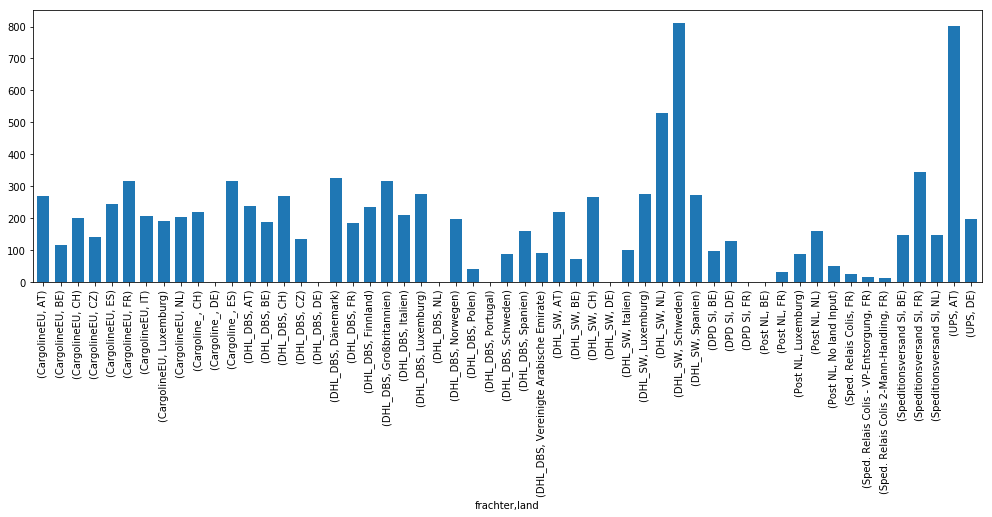

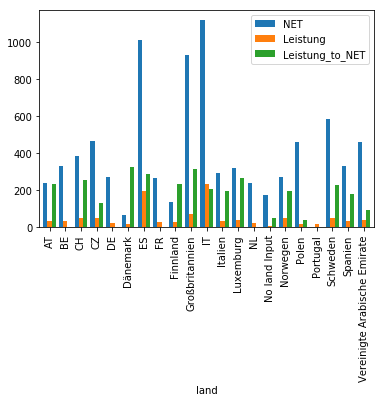

In [271]:
%matplotlib inline
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
pivoted['order'] = pivoted['order'].astype(str)
pivoted['NET'] = pivoted['NET'].astype(float)
pivoted['Leistung'] = pivoted['Leistung'].astype(float)
pivoted['Leistung_to_NET'] = pivoted['Leistung']/pivoted['NET']*1000
display(pivoted.head(1))
pivoted.groupby(['frachter','land']).Leistung_to_NET.mean().plot(kind='bar', figsize=(17,5),width=0.7)
pivoted.groupby('land').mean().plot(kind='bar',width=0.8)

In [240]:
pivoted.NET.mean()

271.5246019874307

In [210]:
afmw.groupby('frachter')['NET'].agg(['mean', 'count'])

AttributeError: 'DataFrameGroupBy' object has no attribute 'get_level_values'

0         True
1         True
2        False
3         True
4         True
5        False
6         True
7         True
8         True
9        False
10        True
11        True
12        True
13        True
14       False
15        True
16        True
17        True
18        True
19        True
20       False
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28        True
29        True
         ...  
37940     True
37941     True
37942    False
37943     True
37944     True
37945     True
37946     True
37947     True
37948     True
37949     True
37950     True
37951     True
37952     True
37953     True
37954     True
37955     True
37956     True
37957     True
37958     True
37959    False
37960     True
37961     True
37962     True
37963    False
37964     True
37965     True
37966     True
37967    False
37968    False
37969     True
Name: frachter, Length: 37970, dtype: bool